In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math
import collections

In [3]:
def read_file(folder, step_number, filename_list):
    data = collections.defaultdict(list)
    path_to_file = folder + '/' + folder + '.iter' + step_number + '/'
    for filename in filename_list:
        full_name = path_to_file + filename
        file = open(full_name, 'r')
        file = file.readlines()
        for line in file: 
            line = line.rstrip('\n')
            line = line.split(',')
            for i, element in enumerate(line):
                new_element = float(element)
                line[i] = new_element
            data['index'].append(line[0])
            data['x'].append(line[1])
            data['y'].append(line[2])
            data['z'].append(line[3])        
            data['Rho'].append(line[4])
            data['V_x'].append(line[5])        
            data['V_y'].append(line[6])
            data['V_z'].append(line[7])
            data['wws'].append(line[8])
    return data

In [4]:
def calc_temp_conv(id_all, folder, filename_list): 
    temporal_convergence = collections.defaultdict(list)
    for ids in id_all:     
        data = read_file(folder, ids, filename_list)
        ids = int(ids)
        num_dataset = len(data['index'])
        V_x = np.array(data['V_x'])
        V_y = np.array(data['V_y'])
        V_z = np.array(data['V_z'])
        velocity = np.sqrt(V_x ** 2 + V_y ** 2 + V_z ** 2)
        V_max = max(velocity)
        temporal_convergence['timestep'].append(ids)
        temporal_convergence['v_max'].append(V_max)
    return temporal_convergence

In [5]:
def creat_id_list(initial_time_step, count_time):
    id_all = []
    for i in np.arange(1, count_time + 1):
        id = i * initial_time_step + 100000000
        id_str = str(id)
        id_str_pop = id_str[1:]
        id_all.append(id_str_pop)
    return id_all

In [6]:
id_all = creat_id_list(1600, 40)
folder = 'slc_plinko_2p0'
filename_list = ['1.slice.0000007.csv']
temporal_convergence_2p0 = calc_temp_conv(id_all, folder, filename_list)

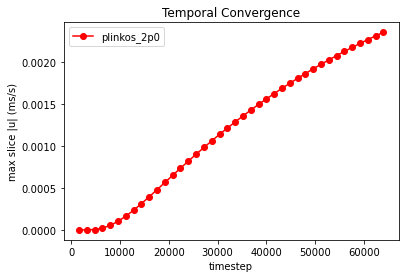

In [7]:
plt.figure()
plt.plot(temporal_convergence_2p0['timestep'], temporal_convergence_2p0['v_max'], '-or', label = 'plinkos_2p0')
plt.legend()
plt.title('Temporal Convergence')
plt.xlabel('timestep')
plt.ylabel('max slice |u| (ms/s)')
#plt.ylim(-0.01, 0.01)
plt.show()

In [8]:
id_all = creat_id_list(6400, 40)
folder = 'slc_plinko_1p0'
filename_list = [#'0.slice.0000000.csv', 
'1.slice.0000007.csv']
temporal_convergence_1p0 = calc_temp_conv(id_all, folder, filename_list)

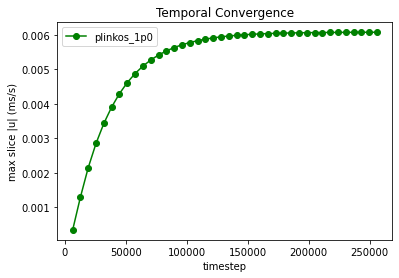

In [9]:
plt.figure()
plt.plot(temporal_convergence_1p0['timestep'], temporal_convergence_1p0['v_max'], '-og', label = 'plinkos_1p0')
plt.legend()
plt.title('Temporal Convergence')
plt.xlabel('timestep')
plt.ylabel('max slice |u| (ms/s)')
# plt.ylim(0.001, 0.008)
plt.show()

In [10]:
id_all = creat_id_list(25600, 40)
folder = 'slc_plinko_0p5'
filename_list = ['1.slice.0000115.csv', '1.slice.0000121.csv', '1.slice.0000122.csv']
temporal_convergence_0p5 = calc_temp_conv(id_all, folder, filename_list)

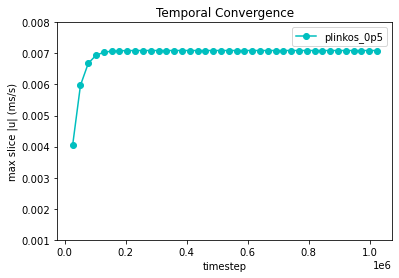

In [11]:
plt.figure()
plt.plot(temporal_convergence_0p5['timestep'], temporal_convergence_0p5['v_max'], '-oc', label = 'plinkos_0p5')
plt.legend()
plt.title('Temporal Convergence')
plt.xlabel('timestep')
plt.ylabel('max slice |u| (ms/s)')
plt.ylim(0.001, 0.008)
plt.show()

In [12]:
id_all = creat_id_list(102400, 18)
folder = 'slc_plinko_0p25'
filename_list = ['1.slice.0000117.csv', '1.slice.0000118.csv', '1.slice.0000124.csv', '1.slice.0000126.csv',
                 '1.slice.0000127.csv']
temporal_convergence_0p25 = calc_temp_conv(id_all, folder, filename_list)

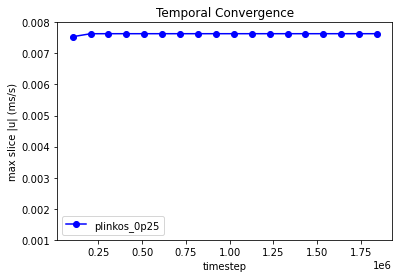

In [14]:
plt.figure()
plt.plot(temporal_convergence_0p25['timestep'], temporal_convergence_0p25['v_max'], '-ob', label = 'plinkos_0p25')
plt.legend()
plt.title('Temporal Convergence')
plt.xlabel('timestep')
plt.ylabel('max slice |u| (ms/s)')
plt.ylim(0.001, 0.008)
plt.show()